# PIMA Indians Diabetes Classification 
***
This notebook is a end to end study in machine learning with different concepts like :
   - Exploratry Data Analysis
   - Handling Missing Values
   - Show Correlation between Variables
   - Classifying diabetes using 6 different algorithms :
       - Logistic Regression
       - SVM
       - Naive Bayes Classifier
       - Decision Tree
       - Multi Layer Perceptron
       - K-Nearest Neighbor 
   - Comparing Models

## What is Diabetes ?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces.

Insulin is a hormone made by the pancreas, that acts like a key to let glucose from the food we eat pass from the blood stream into the cells in the body to produce energy. All carbohydrate foods are broken down into glucose in the blood. Insulin helps glucose get into the cells.

Not being able to produce insulin or use it effectively leads to raised glucose levels in the blood (known as hyperglycaemia). Over the long-term high glucose levels are associated with damage to the body and failure of various organs and tissues.

There are three main types of diabetes – *type 1*, *type 2* and *gestational*.

  1. **Type 1** diabetes can develop at any age, but occurs most frequently in children and adolescents. When you have type 1 diabetes, your body produces very little or no insulin, which means that you need daily insulin injections to maintain blood glucose levels under control.
  
  2. **Type 2** diabetes is more common in adults and accounts for around 90% of all diabetes cases. When you have type 2 diabetes, your body does not make good use of the insulin that it produces. The cornerstone of type 2 diabetes treatment is healthy lifestyle, including increased physical activity and healthy diet. However, over time most people with type 2 diabetes will require oral drugs and/or insulin to keep their blood glucose levels under control.
  
  3. **Gestational** diabetes (GDM) is a type of diabetes that consists of high blood glucose during pregnancy and is associated with complications to both mother and child. GDM usually disappears after pregnancy but women affected and their children are at increased risk of developing type 2 diabetes later in life.
  
Source information : [International Diabetes Federation](https://www.idf.org/aboutdiabetes/what-is-diabetes.html)

## Who are Pima Indians ?
The Pima (or Akimel Oʼodham, also spelled Akimel Oʼotham, “River People”, formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel Oʼodham are based in two reservations: the Keli Akimel Oʼotham on the Gila River Indian Community (GRIC) and the On’k Akimel Oʼodham on the Salt River Pima-Maricopa Indian Community (SRPMIC). 

![title](images/PIMA.jpg)

## Diabets Dataset 

Our data comes from Kaggle but was first introduced in the paper : [Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf)

The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes. Each community resident over 5 years of age was asked to undergo a standardized examination every two years, which included an oral glucose tolerance test. Diabetes was diagnosed according to World Health Organization Criteria; that is, if the 2 hour post-load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

Here is a summary of the Dataset:
  - **Pregnancies** : Number of times pregnant.
  - **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
  - **BloodPressure** : Diastolic blood pressure (mm Hg).
  - **SkinThickness** : Triceps skin fold thickness (mm).
  - **Insulin** : 2-Hour serum insulin (mu U/ml).
  - **BMI** : Body mass index (kg/m).
  - **DiabetesPedigreeFunction** : Diabetes Pedigree Function (DPF).
  - **Age** : Age (years).
  - **Outcome** : Class variable (0 - healthy or 1 - diabetic).

## Load libraries 

In [1]:
# Data manipulation & linear algebra:
import numpy as np
import pandas as pd

# Plots:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
#sns.set_style('whitegrid')

# Data processing, metrics and modeling:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
# -------------- Logistic Regression --------------
from sklearn.linear_model import LogisticRegression
# ---------------------- SVM ----------------------
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# ------------------ Naive Bayes ------------------
from sklearn.naive_bayes import GaussianNB
# ----------------- Desicion Tree -----------------
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# ---------------------- MLP ----------------------
from sklearn.neural_network import MLPClassifier
# ------------------ K Neighbors ------------------
from sklearn.neighbors import KNeighborsClassifier

# Ignore warning messages:
import warnings
warnings.filterwarnings('ignore') 

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Load & Read Dataset 

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
np.random.seed(1)
samples = df.iloc[np.random.permutation(len(df))] 
samples.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
285,7,136,74,26,135,26.0,0.647,51,0
101,1,151,60,0,0,26.1,0.179,22,0
581,6,109,60,27,0,25.0,0.206,27,0
352,3,61,82,28,0,34.4,0.243,46,0
726,1,116,78,29,180,36.1,0.496,25,0


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Variables data types 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Exploratory Data Analysis 
### Basics Statistics 

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Relationships between each variable 

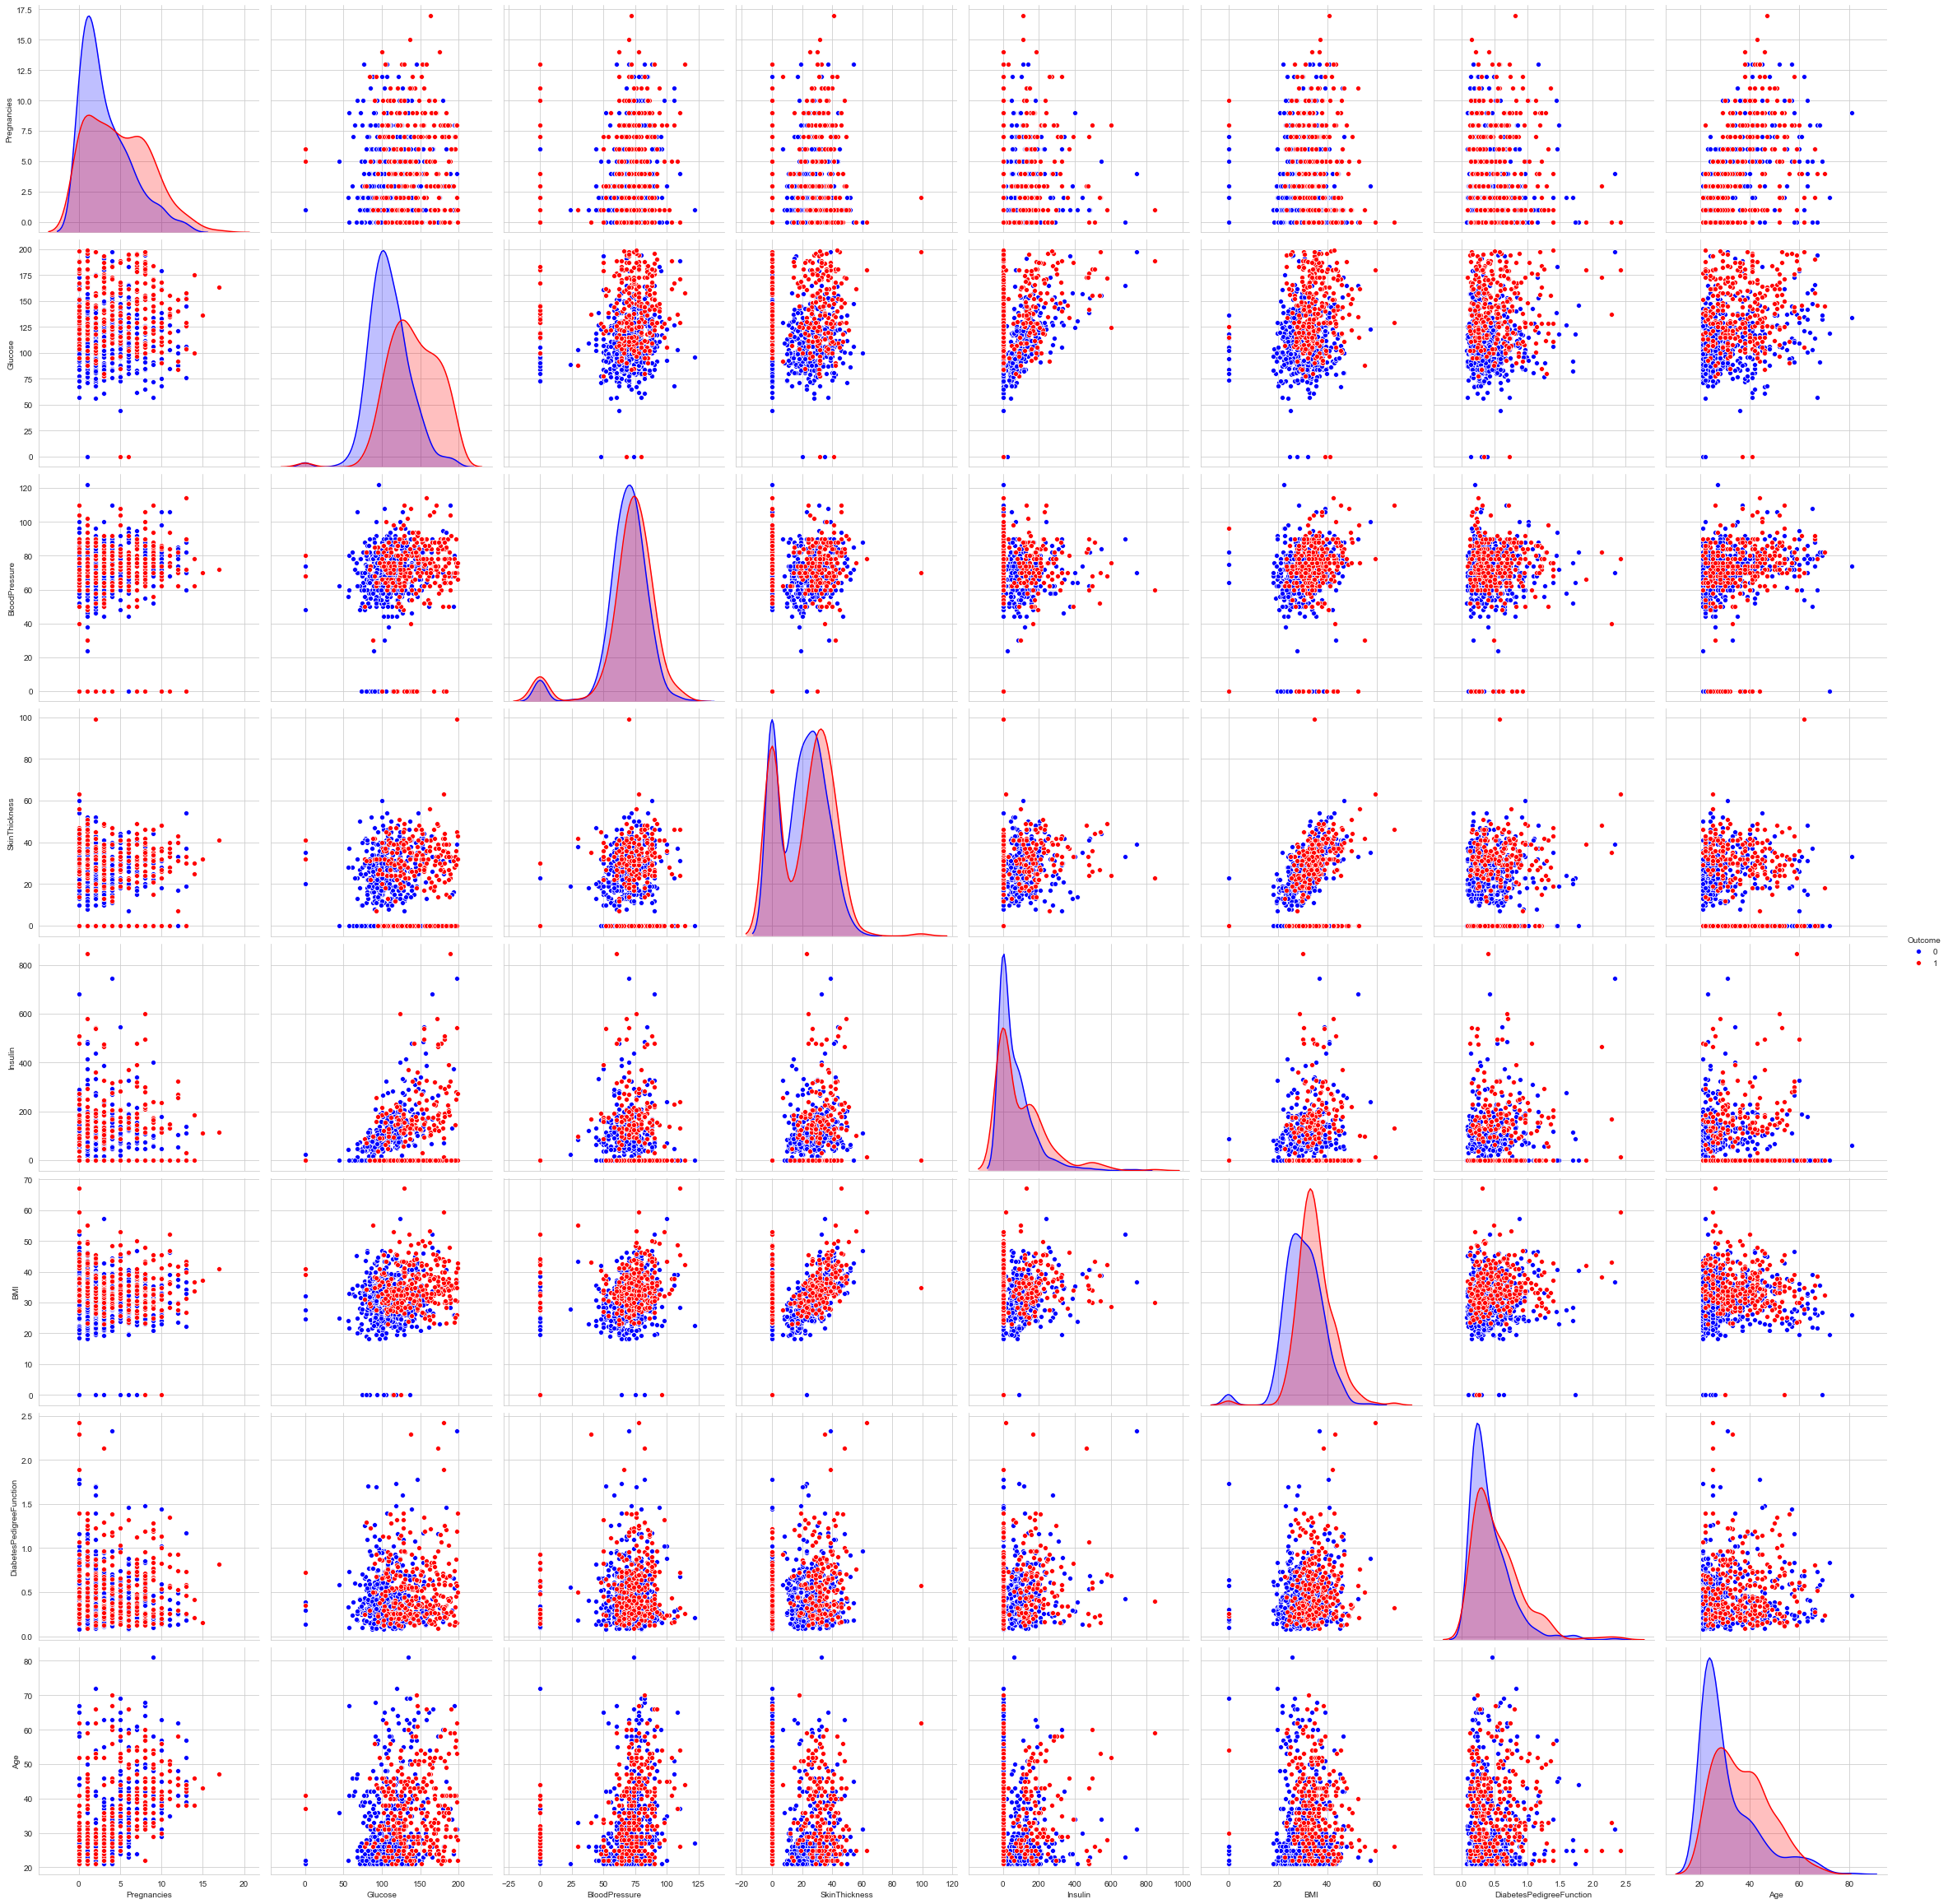

In [7]:
with sns.axes_style("whitegrid"):
    sns.pairplot(df, hue="Outcome", palette=['blue','red'], size=4);
    plt.show()

### Target's distribution 

In [8]:
D = df[(df['Outcome'] != 0)] #Define diabetic variable
H = df[(df['Outcome'] == 0)] #Define healthy variable

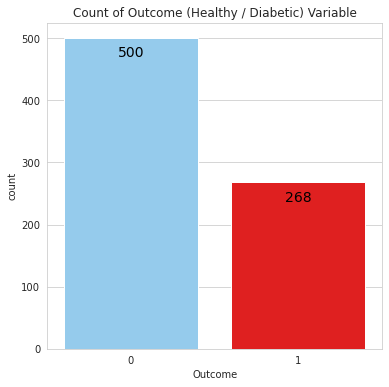

In [9]:
#Count plot using seaborn
with sns.axes_style("whitegrid"):
    sample_size = df.shape[0] 
 
    counts = df.iloc[:sample_size,:].groupby('Outcome')['Outcome'].count()

    f = plt.figure(figsize=(6,6))
    f.add_subplot(111)
    
    sns.countplot(df['Outcome'], palette=['lightskyblue','red'])


for i in counts.index:
    plt.text(i,counts.values[i]-30,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.title("Count of Outcome (Healthy / Diabetic) Variable")
plt.show()

In [10]:
#Count plot using plotly
def target_count():
    trace = go.Bar( x = df['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=df['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'red'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    fig['layout'].update(title_text = 'Count of Outcome variable', title_x=0.5 )

    py.iplot(fig)

In [11]:
target_count()

![image](images/newplot1.png)

The graph above shows that the data is unbalanced. The number of non-diabetic is 268 the number of diabetic patients is 500.

### Distribution of healthy vs diabetic people 

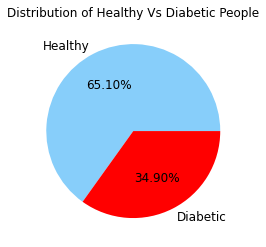

In [12]:
#Distribution plot using matplotlib:
df.Outcome.value_counts().plot.pie(labels = ("Healthy", "Diabetic"), label="", autopct = "%.2f%%", fontsize = 12., colors=['lightskyblue','red'])
plt.title("Distribution of Healthy Vs Diabetic People")
plt.show()

In [13]:
#Distribution plot usiong plotly
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = df['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'red'], 
                               line=dict(color='#000000', width=1.5)))

    layout = dict(title ='Healthy Vs Diabetic')

    fig = dict(data = [trace], layout=layout)
    fig['layout'].update(title_text = 'Healthy Vs Diabetic', title_x=0.5 )

    py.iplot(fig)
    
target_percent()

![image](images/newplot2.png)

Little above 65% of the patients in our dataset are healthy. That means that our model should be more accurate than 65% of the time.

### Insulin levels

In [85]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['red', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title_text = data_select, title_x=0.5 )

    py.iplot(fig, filename = 'Density plot')

In [15]:
plot_distribution('Insulin', 0)

![title](images/insuline_plot.png)

Note that there is a big overlap between the two distributions. Also, we have a lot of 0s in the dataset. Seems like we have a lot of missing values. NaNs are replaced with 0s.

### Glucose concentration 

In [16]:
plot_distribution('Glucose', 0)

![image](images/glucose_plot.png)

While there is some overlap, this test seems like it separates the healthy from diabetic patients pretty well.

### Skin Thickness distribution

In [17]:
plot_distribution('SkinThickness', 0)

![images](images/skint_plot.png)

### Blood Pressure distribution

In [18]:
plot_distribution('BloodPressure', 0)

![images](images/bloodb_plot.png)

### BMI distribution

In [19]:
plot_distribution('BMI', 0)

![images](images/bmi_plot.png)

### Age distribution

In [20]:
plot_distribution('Age', 0)

![images](images/age_plot.png)

Generally speaking, it seems like older people are more likely to have diabetes.

### Pregnancies distribution 

In [21]:
plot_distribution('Pregnancies', 0)

![images](images/preg_plot.png)

### Diabetes Pedigree Function distribution 

In [22]:
plot_distribution('DiabetesPedigreeFunction', 0)

![images](images/pfd_plot.png)

## Handling Missing Values :
We saw on data samples that some features contain 0, it doesn't make sense here and this indicates missing value. So it will be better to replace 0 values by NaN.

In [23]:
# Replace 0 values by NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
# Sum of null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    fig['layout'].update(title_text = 'Missing Values (count & %)', title_x=0.5 )

    py.iplot(fig)

Now, we can look at where are missing values :

In [26]:
missing_plot(df, 'Outcome')

![images](images/outcome_plot.png)

According to graph above, we can see that missing values are :

 - **Insulin** = 48.7% - 374
 - **SkinThickness** = 29.56% - 227
 - **BloodPressure** = 4.56% - 35
 - **BMI** = 1.43% - 11
 - **Glucose** = 0.65% - 5

### Statistical information (Medians, Ranges, & Outliers) 

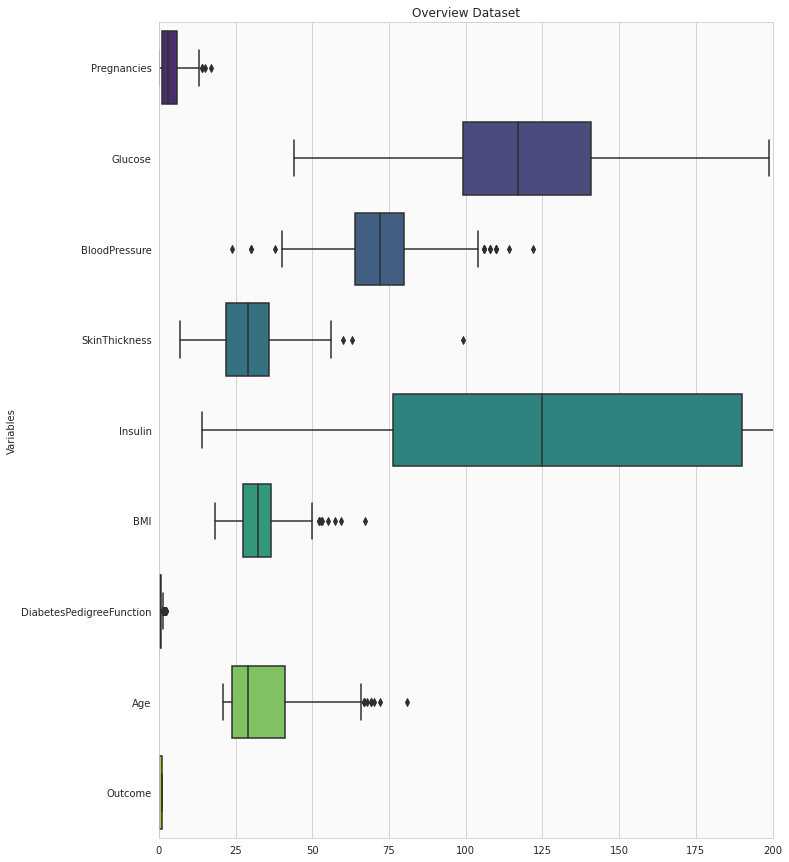

In [27]:
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(11, 15))
    ax.set_facecolor('#fafafa')
    ax.set(xlim=(-.05, 200))
    plt.ylabel('Variables')
    plt.title("Overview Dataset")
    ax = sns.boxplot(data = df, orient = 'h', palette = 'viridis')

All missing values are encoded with NaN value.

To fill these Nan values, we need to understand the distribution of the data against the target.

In [28]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

### Replace missing values of Insulin variable 
To replace missing values, we'll replace NaN values by the variable's median (same results with the mean).So, we'll use median by target (Outcome).

In [29]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [30]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

### Replace missing values of Glucose variable

In [31]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [32]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

### Replace missing values of SkinThickness variable 

In [33]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [34]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

### Replace missing values of BloodPressure variable 

In [35]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [36]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

### Replace missing values of BMI variable 

In [37]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [38]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [39]:
missing_plot(df, 'Outcome')

 According to graph above, we can observe that we no longer have NaN values in our Dataset.

![images](images/mp_plot.png)

## Correlation between variables 
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows us to see which pairs have the highest correlation.

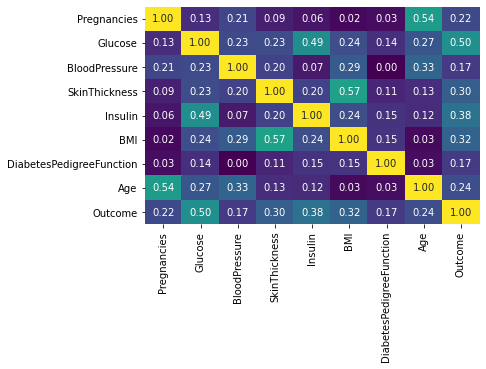

In [40]:
sns.heatmap(df.corr().abs(), cbar=False, annot=True, fmt='.2f', cmap='viridis')
plt.show()

## Machine Learning 
To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 20%, assumed it ideal ratio between training and testing.

### Split Dataset 

In [41]:
Y = df['Outcome'] #Define Target variable
X = df.drop(columns=['Outcome']) #Define Train variable

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [43]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (614, 8)
Y train shape:  (614,)
X test shape:  (154, 8)
Y test shape:  (154,)


### Logistic Regression 
Logistic Regression (contrary to its name) allows you to get binary (yes/no) answers from your data. Moreover, it gives you the probability for each answer. Questions like:

  - Is this email spam?
  - Should I ask my boss for a higher salary?
  - Does this patient have diabetes?
  - Is this person a real friend?
  - Do you get where I am getting at?
  
are answerable using Logistic Regression if sufficient data is available and you’re lucky enough to believe there are answers to all of these?

Let’s have a look at the mathematical formulation of the Logistic Regression. First, let’s start with the Linear Model:   

\begin{align}      
y = b_1.x + b_0    
\end{align}
           
where x is the data we’re going to use to train our model, b1 controls the slope and b0 the interception point with the y axis.

![title](images/logistic_reg.png)

We’re going to use the softmax function to get probabilities out of the Linear Model and obtain a generalized model of Logistic Regression. Softmax Regression allows us to create a model with more than 2 output classes (binary response):

$$ p = \frac{1}{1 + exp^{ (-b_1.x + b_0) }} $$

where b1 defines the steepness of the curve and b0 moves the curve left and right.

We want to use our data X and some training magic to learn the parameters b1 & b0.

Note that this model will give us a probabilistic answer instead of just a binary response. We might decide to ignore a prediction if the model is not sure about it - e.g. below 80%.

In [44]:
#defining the model
logreg = LogisticRegression(C=10)

#train the model
logreg.fit(X_train, Y_train)

#predict target values
Y_predict1 = logreg.predict(X_test)

#### Model performance 
To measure the performance of a model, we need several elements :
    - Confusion matrix : also known as the error matrix, allows visualization of the performance of an algorithm :
            - True Positive (TP) : Diabetic correctly identified as diabetic.
            - True Negative (TN) : Healthy correctly identified as healthy.
            - False Positive (FP) : Healthy incorrectly identified as diabetic.
            - False Negative (FN) : Diabetic incorrectly identified as healthy.
                
    - Metrics :
            - Accuracy : (TP +TN) / (TP + TN + FP +FN)
            - Precision : TP / (TP + FP)
            - Recall : TP / (TP + FN)
            - F1 score : 2 x ((Precision x Recall) / (Precision + Recall))
                
    - Roc Curve : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [45]:
print(classification_report(Y_test,Y_predict1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



#### Confusion Matrix 

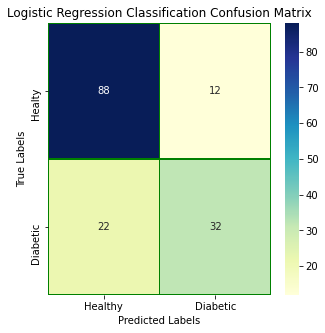

In [46]:
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='green', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ax.xaxis.set_ticklabels(['Healthy', 'Diabetic'])
ax.yaxis.set_ticklabels(['Healty', 'Diabetic'])
plt.show()

#### ROC 

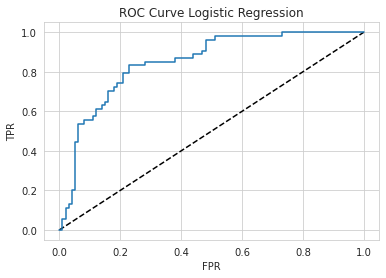

In [47]:
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
with sns.axes_style("whitegrid"):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='ANN')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve Logistic Regression')

#### Test Score 

In [48]:
score_logreg = logreg.score(X_test, Y_test)
print("Logistic Regression Test Score :",score_logreg)

Logistic Regression Test Score : 0.7792207792207793


#### Root Mean Squared Error 

In [49]:
RMSE_logreg = mean_squared_error(Y_test, Y_predict1)
print("Logistic Regression RMSE :",RMSE_logreg)

Logistic Regression RMSE : 0.22077922077922077


### SVM 
A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVM's are more commonly used in classification problems and as such, this is what we will focus on in this post.

SVM's are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below.

![title](images/SVM.png)

In [50]:
#define SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), n_jobs=-1))

#train model
svmcla.fit(X_train, Y_train)

#predict target values
Y_predict2 = svmcla.predict(X_test)

#### Model performance 

In [51]:
print(classification_report(Y_test,Y_predict2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.87      0.87      0.87        54

    accuracy                           0.91       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.91      0.91      0.91       154



#### Confusion Matrix 

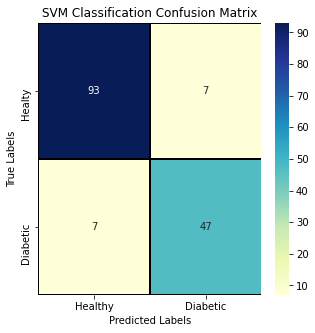

In [52]:
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ax.xaxis.set_ticklabels(['Healthy', 'Diabetic'])
ax.yaxis.set_ticklabels(['Healty', 'Diabetic'])
plt.show()

#### ROC 

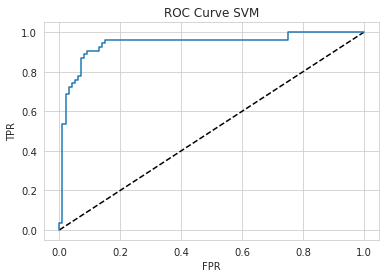

In [53]:
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
with sns.axes_style("whitegrid"):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='ANN')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve SVM')

#### Test Score 

In [54]:
score_svmcla = svmcla.score(X_test, Y_test)
print("SVM Test Score :",score_svmcla)

SVM Test Score : 0.9090909090909091


#### RMSE 

In [55]:
RMSE_svmcla = mean_squared_error(Y_test, Y_predict2)
print("SVM RMSE :",RMSE_svmcla)

SVM RMSE : 0.09090909090909091


### Naive Bayes Classifier 
The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features. Thus, using Bayes theorem  (P(X|Y)=P(Y|X)P(X) / P(Y)) , we can find the probability of  X  happening, given that  Y  has occurred. Here,  Y  is the evidence and  X  is the hypothesis. The assumption made here is that the presence of one particular feature does not affect the other (the predictors/features are independent). Hence it is called naive. In this case we will assume that we assume the values are sampled from a Gaussian distribution and therefore we consider a Gaussian Naive Bayes.

In [56]:
#define model
nbcla = GaussianNB()

#train model
nbcla.fit(X_train, Y_train)

#predict target values
Y_predict3 = nbcla.predict(X_test)

#### Model performance 

In [57]:
print(classification_report(Y_test,Y_predict3))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



#### Confusion Matrix 

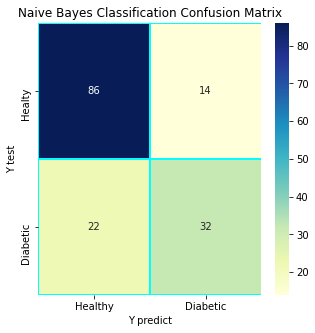

In [58]:
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
ax.xaxis.set_ticklabels(['Healthy', 'Diabetic'])
ax.yaxis.set_ticklabels(['Healty', 'Diabetic'])
plt.show()

#### ROC 

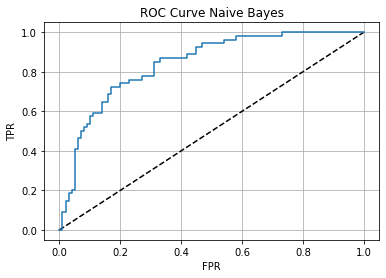

In [59]:
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

#### Test Score 

In [60]:
score_nbcla = nbcla.score(X_test, Y_test)
print("Naive Bayes Test Score :",score_nbcla)

Naive Bayes Test Score : 0.7662337662337663


#### RMSE 

In [61]:
RMSE_nbcla = mean_squared_error(Y_test, Y_predict3)
print("Naive Bayes RMSE :",RMSE_nbcla)

Naive Bayes RMSE : 0.23376623376623376


### Decision Tree 
A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively.

In [62]:
#define the model
dtcla = DecisionTreeClassifier(random_state=9)

#train model
dtcla.fit(X_train, Y_train)

#predict target values
Y_predict4 = dtcla.predict(X_test)

#### Model performance 

In [63]:
print(classification_report(Y_test,Y_predict4))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       0.80      0.80      0.80        54

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



#### Confusion Matrix 

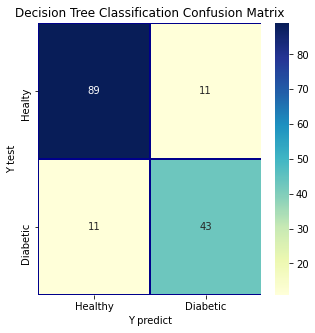

In [65]:
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='darkblue', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
ax.xaxis.set_ticklabels(['Healthy', 'Diabetic'])
ax.yaxis.set_ticklabels(['Healty', 'Diabetic'])
plt.show()

#### ROC 

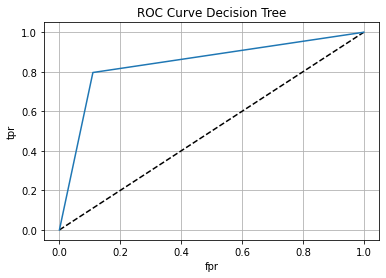

In [66]:
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

#### Test Score 

In [67]:
score_dtcla = dtcla.score(X_test, Y_test)
print("Desicion Tree Test Score :",score_dtcla)

Desicion Tree Test Score : 0.8571428571428571


#### RMSE 

In [68]:
RMSE_dtcla = mean_squared_error(Y_test, Y_predict4)
print("Decision Tree RMSE :",RMSE_dtcla)

Decision Tree RMSE : 0.14285714285714285


### Multilayer Perceptron 
The multilayer perceptron is the hello world of deep learning: a good place to start when you are learning about deep learning.

A multilayer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP. MLPs with one hidden layer are capable of approximating any continuous function.

Multilayer perceptrons are often applied to supervised learning problems3: they train on a set of input-output pairs and learn to model the correlation (or dependencies) between those inputs and outputs. Training involves adjusting the parameters, or the weights and biases, of the model in order to minimize error. Backpropagation is used to make those weigh and bias adjustments relative to the error, and the error itself can be measured in a variety of ways, including by root mean squared error (RMSE).

In [69]:
#define model
MLP = MLPClassifier(random_state=1)

#train model
MLP.fit(X_train, Y_train)

#predict target values
Y_predict5 = MLP.predict(X_test)

#### Model Performance 

In [70]:
print(classification_report(Y_test,Y_predict5))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       100
           1       0.76      0.78      0.77        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



#### Confusion Matrix 

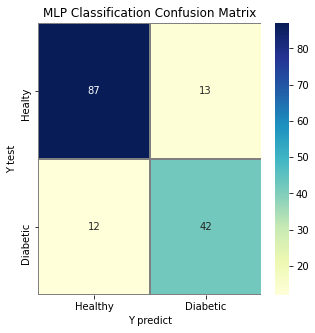

In [71]:
MLP_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(MLP_cm, annot=True, linewidth=0.7, linecolor='gray', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('MLP Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
ax.xaxis.set_ticklabels(['Healthy', 'Diabetic'])
ax.yaxis.set_ticklabels(['Healty', 'Diabetic'])
plt.show()

#### ROC 

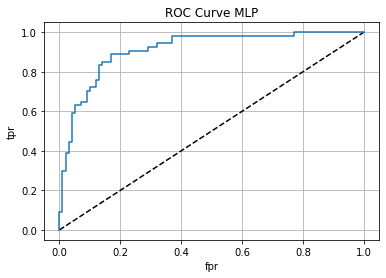

In [72]:
Y_predict5_proba = MLP.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve MLP')
plt.grid(True)

#### Test Score

In [73]:
score_MLP = MLP.score(X_test, Y_test)
print("MLP Test Score :",score_MLP)

MLP Test Score : 0.8376623376623377


#### RMSE 

In [74]:
RMSE_MLP = mean_squared_error(Y_test, Y_predict5)
print("MLP RMSE :",RMSE_MLP)

MLP RMSE : 0.16233766233766234


### K-Nearest Neighbor 

K-Nearest neighbors is a technique that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). This technique is non-parametric since there are no assumptions for the distribution of underlying data and it is lazy since it does not need any training data point model generation. All the training data used in the test phase. This makes the training faster and the test phase slower and more costlier. In this technique, the number of neighbors k is usually an odd number if the number of classes is 2. For finding closest similar points, find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.

In [75]:
#define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

#train model
knncla.fit(X_train, Y_train)

#predict target values
Y_predict6 = knncla.predict(X_test)

#### Model Perfomance 

In [76]:
print(classification_report(Y_test,Y_predict6))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       100
           1       0.82      0.78      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



#### Confusion Matrix 

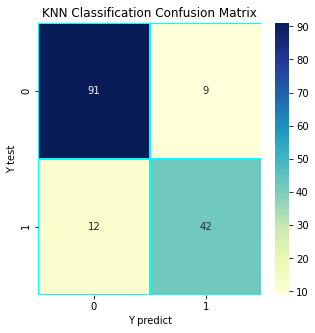

In [77]:
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

#### ROC 

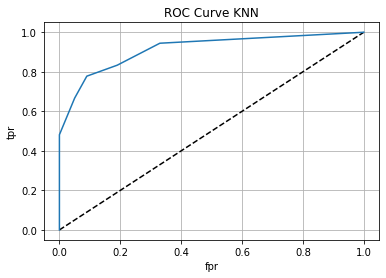

In [78]:
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)

#### Test Score 

In [79]:
score_KNN = knncla.score(X_test, Y_test)
print("KNN Test Score :",score_KNN)

KNN Test Score : 0.8636363636363636


#### RMSE 

In [80]:
RMSE_KNN = mean_squared_error(Y_test, Y_predict6)
print("KNN RMSE :",RMSE_KNN)

KNN RMSE : 0.13636363636363635


## Models Comparisons 
### Comparison of Test Scores 

In [81]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_MLP, score_KNN], 
                        index=['Logistic Regression Score', 'SVM Score', 'Naive Bayes Score', 'Decision Tree Score', 'MLP Score', 'KNN Score']) 

In [82]:
pd.DataFrame(data=Testscores, columns=['Test Score'])

,Test Score
Logistic Regression Score,0.779221
SVM Score,0.909091
Naive Bayes Score,0.766234
Decision Tree Score,0.857143
MLP Score,0.837662
KNN Score,0.863636


### Comparison of RMSE Values 

In [83]:
RMSE_Scores = pd.Series([RMSE_logreg, RMSE_svmcla, RMSE_nbcla, RMSE_dtcla, RMSE_MLP, RMSE_KNN],
                       index = ['Logistic Regression RMSE', 'SVM RMSE', 'Naive Bayes RMSE', 'Decision Tree RMSE', 'MLP RMSE', 'KNN RMSE'])

In [84]:
pd.DataFrame(data=RMSE_Scores, columns=['RMSE'])

,RMSE
Logistic Regression RMSE,0.220779
SVM RMSE,0.090909
Naive Bayes RMSE,0.233766
Decision Tree RMSE,0.142857
MLP RMSE,0.162338
KNN RMSE,0.136364


The following table summarizes the different Test Scores and RMSE's :
<table style="width:20%">
    
<tr>
<th> Model </th>
<th> Test Score </th>
<th> RMSE </th>
</tr>

<tr>
<td> Logistic Regression </td>
<td> 77.9% </td>
<td> 0.22 </td>
</tr>

<tr>
<td> SVM </td>
<td> 90.9% </td>
<td> 0.09 </td>
</tr>

<tr>
<td> Naive Bayes </td>
<td> 76.6% </td>
<td> 0.23 </td>
</tr>

<tr>
<td> Decision Tree </td>
<td> 85.7% </td>
<td> 0.14 </td>
</tr>

<tr>
<td> MLP </td>
<td> 83.7% </td>
<td> 0.16 </td>
</tr>
    
<tr>
<td> KNN </td>
<td> 86.3% </td>
<td> 0.13 </td>
</tr>
      
</table>

 After comparing the different models, we can conclude that the best classification performances are obtained with **SVM** with **Test_Score = 90.9%** & **RMSE = 0.09**.

## Conclusion 
In this Notebook, we built and trained of models, that predicts whether or not a patient has Diabetes. We’ve also met the real-world - processing data, training and building models, are hard things to do. Moreover, not everything is predictable, no matter how many data points we have. That said, there are ways to improve the process of building and training models. We know that using some techniques is better than others, in a certain context. Well, Machine Learning is nuanced.